# Comparação estações INMET

In [10]:
from normaslt import geral
import pandas as pd
import seaborn as sns

In [33]:
estacoes = ['Bauru', 'Rio de Janeiro', 'Teresópolis', 'Juti']
dados, lat, long = geral.readEstacao(estacoes[2], 2022, 2023)

/home/carloska/programas/nbr5422/python/normaslt/geral.py:306: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rad'].fillna(0, inplace=True)


In [34]:
dados.head()

,Data,Hora UTC,precTotal,pMed,pMax,pMin,rad,tMed,tOrv,tMax,tMin,tOrvMax,tOrvMin,umidMax,umidMin,umid,dirVento,ventoRaj,ventoHor,Unnamed: 19
0,2022/01/01,0000 UTC,3.2,903.0,903.4,902.1,0.000000,17.8,15.6,19.3,17.8,16.9,15.4,91.0,81.0,87.0,271.0,10.8,3.4,NaN
1,2022/01/01,0100 UTC,0.8,903.3,903.4,902.9,0.000000,17.8,16.0,18.6,17.2,16.6,15.6,93.0,85.0,89.0,277.0,10.8,2.7,NaN
2,2022/01/01,0200 UTC,0.4,902.8,903.9,902.7,0.000000,17.3,14.4,18.6,17.1,16.4,14.1,90.0,77.0,83.0,272.0,12.1,3.4,NaN
3,2022/01/01,0300 UTC,0.0,901.8,902.9,901.7,0.055556,19.9,16.3,20.0,17.1,16.4,14.4,86.0,79.0,80.0,285.0,10.2,2.4,NaN
4,2022/01/01,0400 UTC,0.0,901.5,902.0,901.5,0.055556,20.4,16.7,20.9,19.9,16.8,16.5,81.0,77.0,79.0,271.0,9.3,2.7,NaN


In [35]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         8760 non-null   object 
 1   Hora UTC     8760 non-null   object 
 2   precTotal    8103 non-null   float64
 3   pMed         8103 non-null   float64
 4   pMax         8084 non-null   float64
 5   pMin         8084 non-null   float64
 6   rad          8760 non-null   float64
 7   tMed         8103 non-null   float64
 8   tOrv         8103 non-null   float64
 9   tMax         8084 non-null   float64
 10  tMin         8084 non-null   float64
 11  tOrvMax      8084 non-null   float64
 12  tOrvMin      8084 non-null   float64
 13  umidMax      8084 non-null   float64
 14  umidMin      8084 non-null   float64
 15  umid         8103 non-null   float64
 16  dirVento     8102 non-null   float64
 17  ventoRaj     8074 non-null   float64
 18  ventoHor     8102 non-null   float64
 19  Unname

In [36]:
dados.describe().round(2)

,precTotal,pMed,pMax,pMin,rad,tMed,tOrv,tMax,tMin,tOrvMax,tOrvMin,umidMax,umidMin,umid,dirVento,ventoRaj,ventoHor,Unnamed: 19
count,8103.00,8103.00,8084.00,8084.00,8760.00,8103.00,8103.00,8084.00,8084.00,8084.00,8084.00,8084.00,8084.00,8103.00,8102.00,8074.00,8102.00,0.0
mean,0.39,907.45,907.68,907.23,154.37,17.86,14.58,18.44,17.32,15.15,14.07,85.63,79.59,82.72,239.71,3.69,0.92,NaN
std,1.82,3.40,3.38,3.41,258.29,4.05,3.40,4.20,3.90,3.38,3.44,12.56,15.78,14.37,63.90,2.19,0.74,NaN
min,0.00,896.80,897.40,896.70,0.00,6.20,0.80,6.30,5.80,2.30,-1.20,35.00,20.00,27.00,1.00,0.00,0.00,NaN
25%,0.00,905.10,905.40,904.90,0.00,15.20,12.00,15.60,14.80,12.68,11.50,79.00,69.00,74.00,237.00,2.10,0.30,NaN
50%,0.00,907.30,907.50,907.10,0.89,18.00,15.30,18.40,17.50,15.80,14.80,90.00,83.00,87.00,258.00,3.40,0.80,NaN
75%,0.00,909.70,909.90,909.50,210.06,20.50,17.20,21.10,19.80,17.70,16.80,96.00,94.00,95.00,276.00,5.10,1.40,NaN
max,65.40,918.00,918.30,918.00,1178.00,30.20,22.90,31.00,29.30,23.20,21.20,98.00,97.00,98.00,360.00,16.10,5.00,NaN


<Axes: title={'center': 'Teresópolis'}>

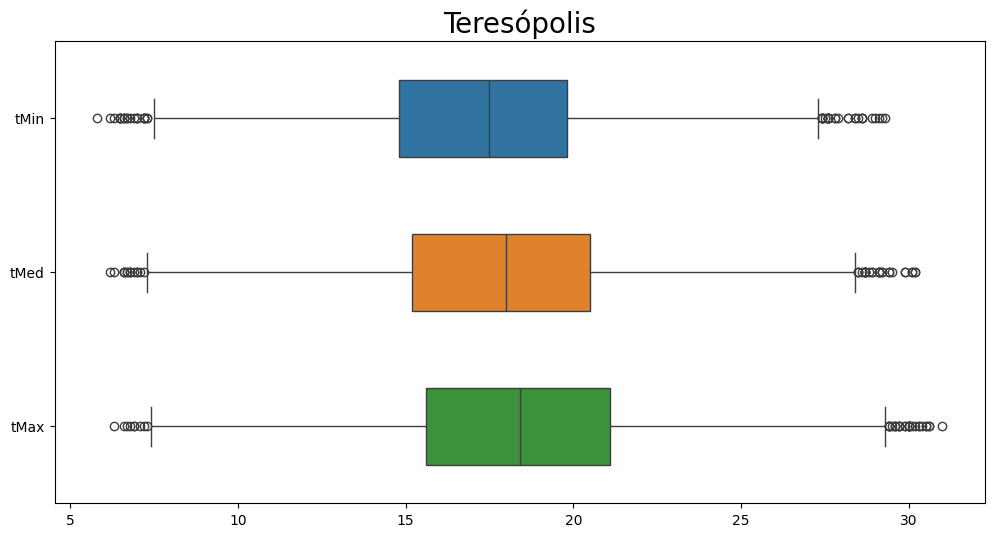

In [37]:
ax = sns.boxplot(data=dados[['tMin', 'tMed', 'tMax']], orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title(estacoes[2], fontsize=20)
ax